# Notebook to demonstrate the making of an RGB image

This notebook demonstrates how one can create an rgb image as defined in `reproject_combine.py` using the `make_rgb()` function.

In [1]:
# use the entire screen width for the notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
# imports
import os
import sys
import glob
import numpy as np
#
import matplotlib.pyplot as plt
#
import warnings
warnings.filterwarnings('ignore')
#
from astropy.io import fits
from astropy.wcs import WCS
from astropy.visualization import make_lupton_rgb
#
import reproject as rpj

# add the code folder to the sys path
sys.path.append('../code')
from reproject_combine import reproject, make_rgb


In [3]:
# make interactive plots
%matplotlib notebook

Firstly we are going to define the working directory and choose which files we want to read in. This prints the 'Found' files underneath.

In [4]:
# open target image
directory = '/mnt/d/st_images/Carina_level3/' # set your own dir here
files = glob.glob(directory + '/*i2d.fits')

print('Found:')
for f in files:
    print(f)


Found:
/mnt/d/st_images/Carina_level3/jw02731-o001_t017_nircam_clear-f090w_i2d.fits
/mnt/d/st_images/Carina_level3/jw02731-o001_t017_nircam_clear-f187n_i2d.fits
/mnt/d/st_images/Carina_level3/jw02731-o001_t017_nircam_clear-f200w_i2d.fits
/mnt/d/st_images/Carina_level3/jw02731-o001_t017_nircam_clear-f335m_i2d.fits
/mnt/d/st_images/Carina_level3/jw02731-o001_t017_nircam_clear-f444w_i2d.fits
/mnt/d/st_images/Carina_level3/jw02731-o001_t017_nircam_f444w-f470n_i2d.fits
/mnt/d/st_images/Carina_level3/jw02731-o002_t017_miri_f1130w_i2d.fits
/mnt/d/st_images/Carina_level3/jw02731-o002_t017_miri_f1280w_i2d.fits
/mnt/d/st_images/Carina_level3/jw02731-o002_t017_miri_f1800w_i2d.fits
/mnt/d/st_images/Carina_level3/jw02731-o002_t017_miri_f770w_i2d.fits


In [5]:
# select rgb files, can be lists if more than one needs to be combined in a given channel
r = glob.glob(directory+'*f444w-f470n*')
g = glob.glob(directory+'*f335m*')
b = glob.glob(directory+'*f187n*')

# get data and science headers, reroject onto R reference
with fits.open(r[0]) as hdu:
    tar_sci_data = hdu['SCI'].data
    tar_sci_header = hdu['SCI'].header

target_wcs = WCS(tar_sci_header) # get target WCS info

#reproject each channel
repro_r = reproject(r, target_wcs, tar_sci_data) # get reprojected image arrays
repro_g = reproject(g, target_wcs, tar_sci_data) # get reprojected image arrays
repro_b = reproject(b, target_wcs, tar_sci_data) # get reprojected image arrays

In [6]:
# make the lupton RGB
list_images = [repro_b[0], repro_g[0], repro_r[0]]
rgb_img = make_rgb(list_images, stretch=50, Q=4, minimum=0, custom_stack=None)

### Plotting
After obtaining the rgb image using `make_rgb` above, plot the image using right ascension and declination coordinates as obtained from the world coordinate system (WCS) information. `set_ticklabel_position` had to be set as without it, there would be no axes labels seen on output plot. The plot is conveniently interactive in this notebook.

<IPython.core.display.Javascript object>


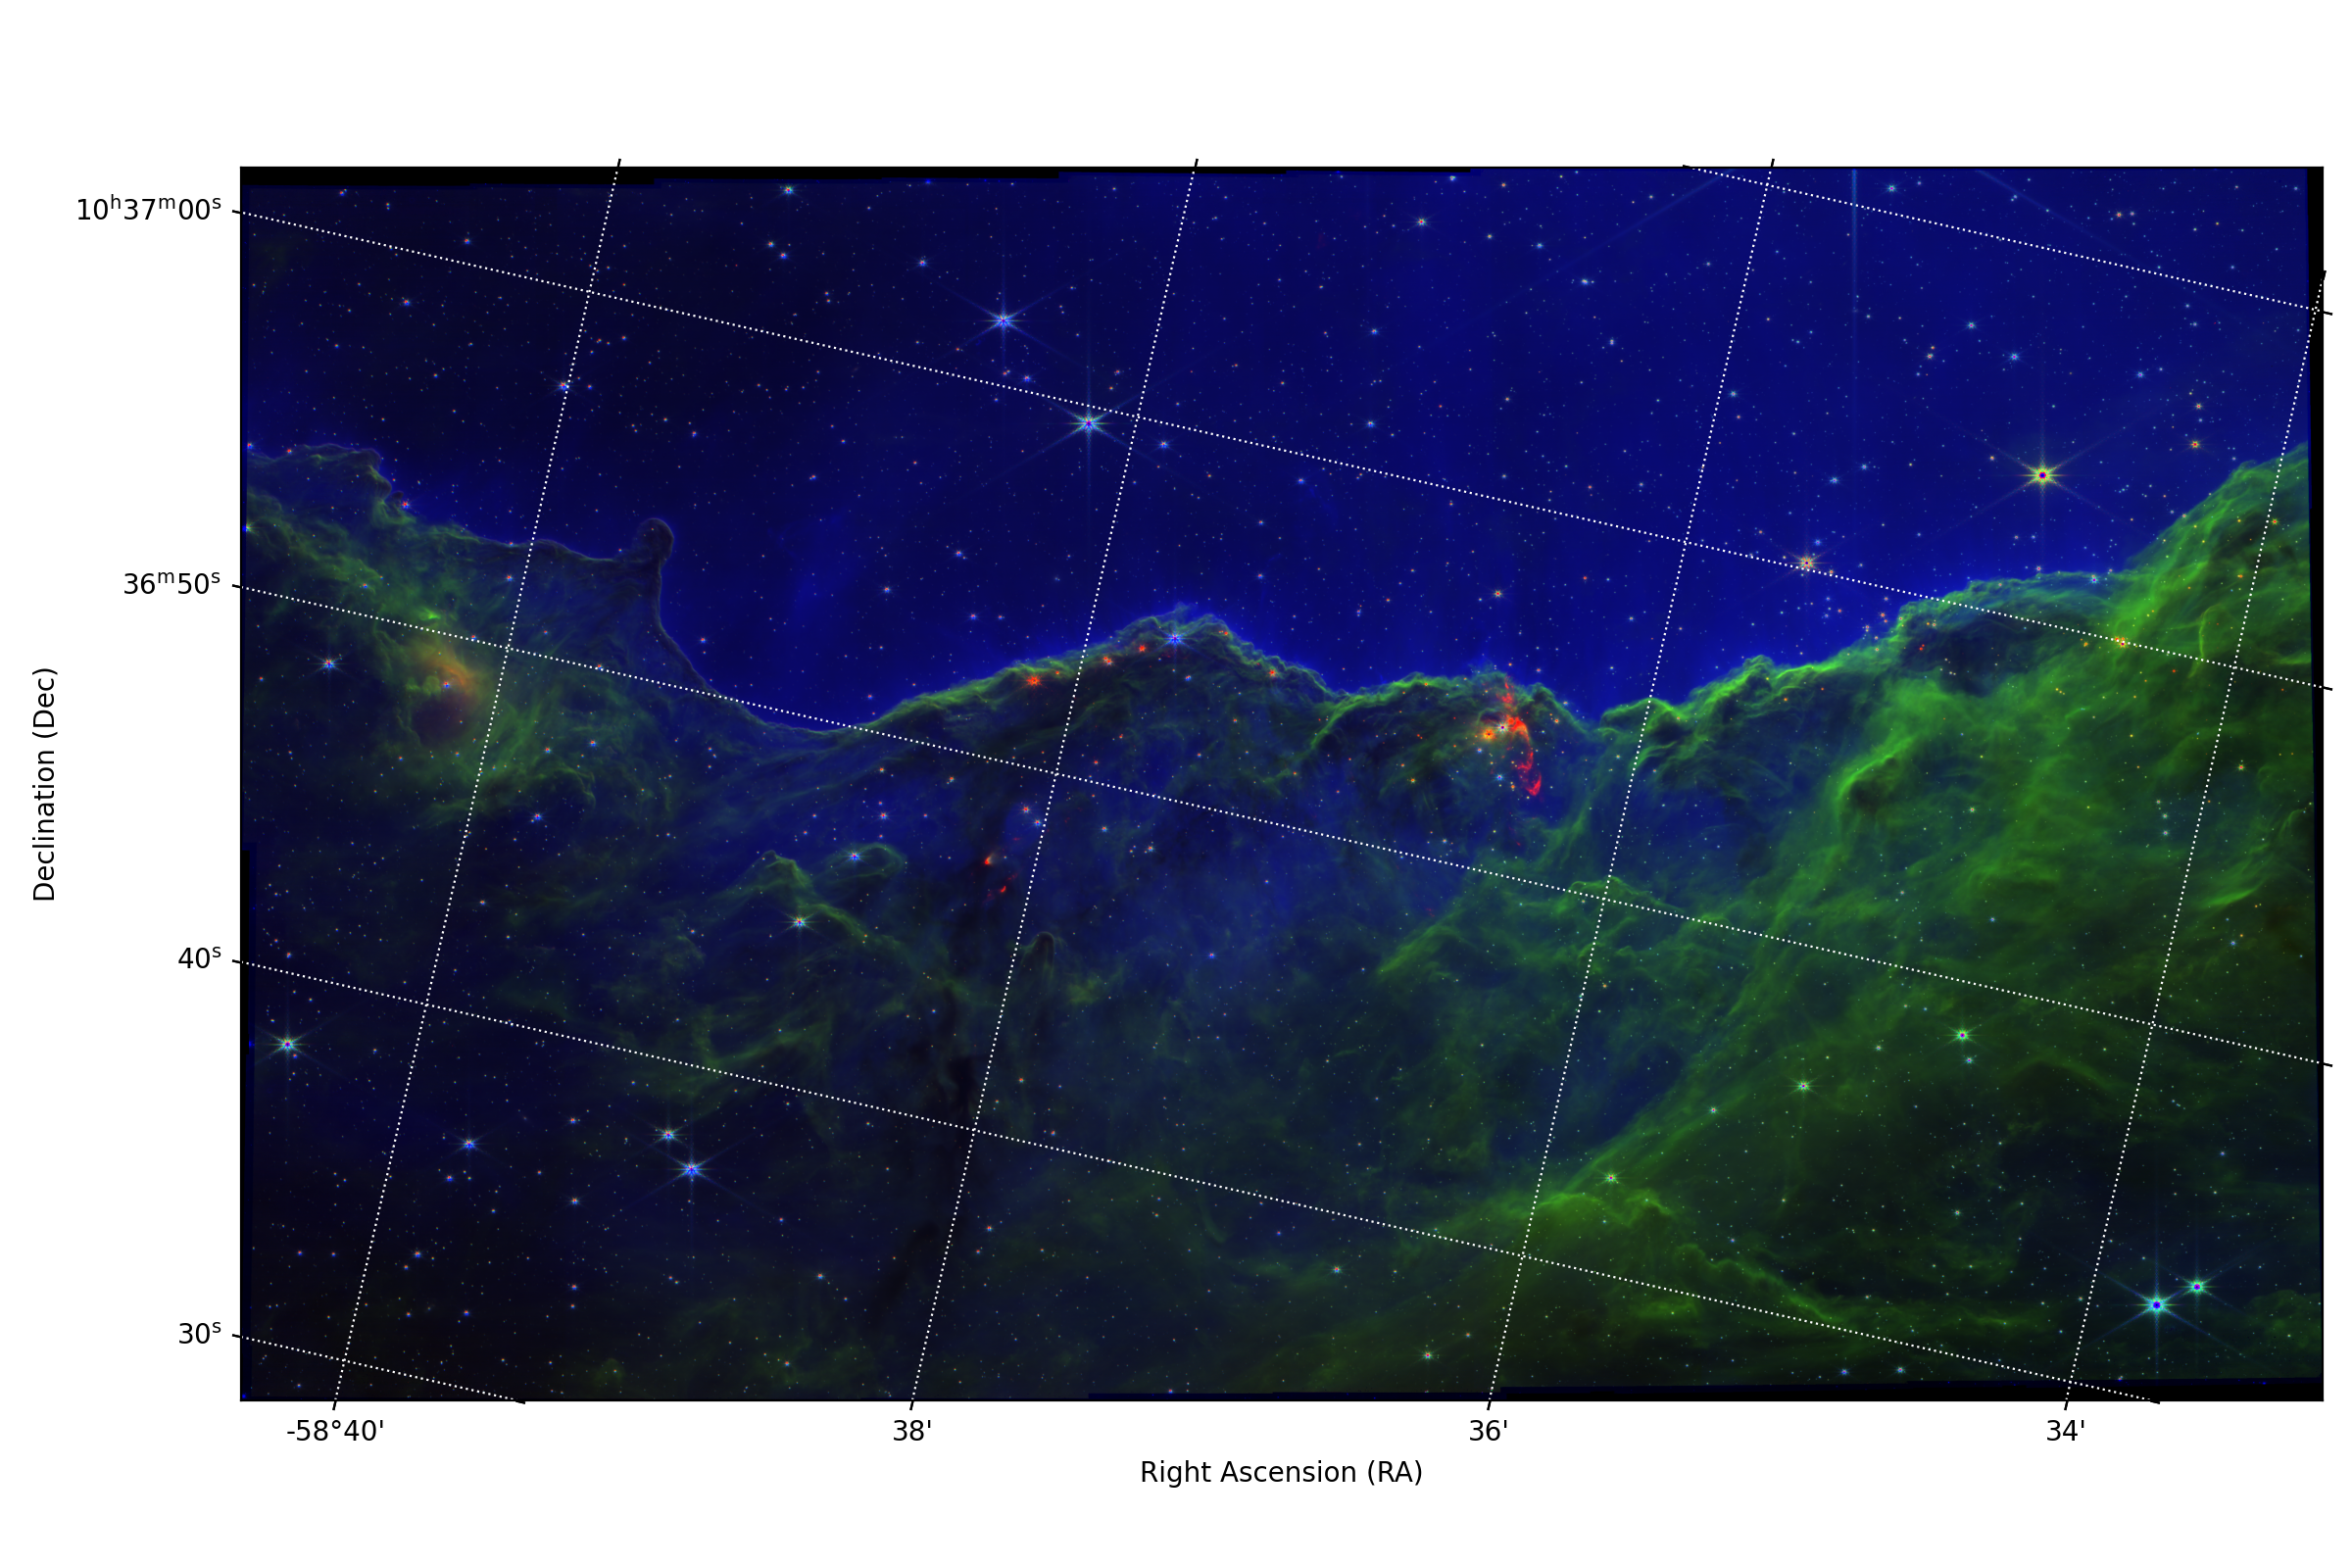

In [9]:
# Plot the rgb image
plt.figure(figsize=(12,8))
axs = plt.subplot(1, 1, 1, projection=target_wcs)
axs.imshow(rgb_img, origin='lower')
axs.grid(color='white', ls='dotted')
axs.coords['ra'].set_ticklabel_position('l')
axs.coords['dec'].set_ticklabel_position('b')
axs.coords['ra'].set_axislabel('Right Ascension (RA)', fontsize=10)
axs.coords['dec'].set_axislabel('Declination (Dec)', fontsize=10)
plt.tight_layout(rect=(0.09,0,1,1)) # keeping this in seems to crop Dec label
# plt.savefig('coordinate_system.png', dpi=300, bbox_inches='tight')
plt.show()